In [1]:
from __future__ import absolute_import, division
from tsfresh.feature_extraction import extract_features, EfficientFCParameters
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys,os
import pandas as pd
from seglearn.transform import SegmentX
from seglearn.feature_functions import maximum,minimum
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from scipy import signal




In [118]:
# names = ["cjc", "qst", "smj"]
# PATH = 'output_old/'
# PATH = '/home/cjc/Documents/2019Summer/Texadar/data/userStudy0903/'
# PATH = '/home/cjc/Documents/2019Summer/Texadar/data/output_userStudy0903processed/'
PATH = '/home/cjc/Documents/2019Summer/Texadar/data/output_userStudy0903processed_without_rect_slowswipe/'
names = ['cjc','gbs','lhy','ljh','lyz','zsy','zzy','sb','wdy','zdy']
# gesture=['button','check','circle','double_tap','fast_swipe','finger_rub',
#          'finger_slide','hold','slow_swipe','pull','push','rect','round',
#          'single_tap']
gesture=['button','check','circle','double_tap','fast_swipe','finger_rub',
         'finger_slide','hold','pull','push','round',
         'single_tap']
x=[]
y=[]
X=[]

flag = 0
data_size = 3600
data_len = 1000
for i in range(3600):
    x.append([])
##-------extract--------
maxlen=0
for name_idx in range(10):#len(names)
    print(names[name_idx])
    for gest_idx in range(len(gesture)):
        for i in range(1,31):
            curr_file = PATH + names[name_idx] + '_' + gesture[gest_idx] + '_'+str(i) +'_filtered.txt'
            data = []
            with open(curr_file,'r') as file:
                data = np.loadtxt(file,delimiter=',')
           
            data = data.reshape(1,-1)[0]
#             print(data.shape)
#             data = data[152:]
#             b, a = signal.butter(8, 0.20, 'lowpass')#0.2 -> 100Hz
#             sig = signal.filtfilt(b, a, data)#data为要过滤的信号
#             b, a = signal.butter(8, 0.20, 'highpass')
#             noise = signal.filtfilt(b, a, data)
    
            x[name_idx*360+gest_idx*30+i-1]=data

cjc
gbs
lhy
ljh
lyz
zsy
zzy
sb
wdy
zdy


In [119]:
y = []
for i in range(10):
    for j in range(12):
        for z in range(30):
            y.append(j)
print(len(y))
t = []
for j in range(data_len):
    t.append(j)
print(len(t))

3600
1000


In [120]:
for i in range(3600):
    if(len(x[i])!=1000):
        print(i,len(x[i]))

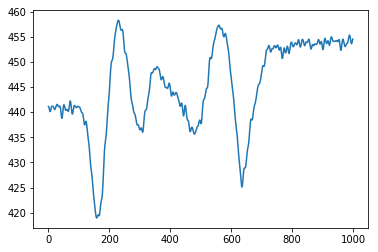

In [121]:
plt.plot(x[200-2])

In [122]:
for i in range(data_size):
    temp = np.array(x[i]).reshape(-1,1)
    tempt = np.array(t).reshape(-1,1)
#     print(temp.shape,tempt.shape)
    res = np.append(tempt,temp,axis=1)
#     print(res.shape)
    tempdf = pd.DataFrame(data=res,
                index=[j for j in range(len(t)*i,len(t)*i+len(t))],
                columns=['time','v'])
    tempdf.insert(0, 'id',[i]*len(t))
#     print(tempdf)
    if(i==0):
        X = tempdf
    else:
        X = X.append(tempdf)

In [123]:
from tsfresh.feature_extraction import extract_features, EfficientFCParameters
extracted_features = extract_features(X, column_id='id', column_sort='time', default_fc_parameters=EfficientFCParameters())

Feature Extraction: 100%|██████████| 15/15 [20:55<00:00, 57.46s/it] 


In [124]:
extracted_features.to_csv("/home/cjc/Documents/2019Summer/Texadar/data/final1000.csv")

In [125]:
y =  np.array(y)

In [126]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
impute(extracted_features)
features_filtered = select_features(extracted_features, y)

In [127]:
features_filtered.to_csv("/home/cjc/Documents/2019Summer/Texadar/data/final_filtered1000.csv")

In [128]:
print(features_filtered.shape)

(3600, 520)


In [85]:
features_filtered.head()

variable,v__autocorrelation__lag_9,v__autocorrelation__lag_8,v__number_peaks__n_3,v__autocorrelation__lag_1,v__partial_autocorrelation__lag_1,v__autocorrelation__lag_7,v__number_peaks__n_1,v__autocorrelation__lag_6,v__autocorrelation__lag_5,v__autocorrelation__lag_2,...,"v__fft_coefficient__coeff_10__attr_""angle""","v__fft_coefficient__coeff_9__attr_""angle""",v__ratio_beyond_r_sigma__r_1.5,"v__fft_coefficient__coeff_56__attr_""imag""","v__fft_coefficient__coeff_75__attr_""imag""","v__fft_coefficient__coeff_37__attr_""angle""",v__variance,v__standard_deviation,v__ratio_beyond_r_sigma__r_1,"v__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""rvalue"""
id,,,,,,,,,,,,,,,,,,,,,
0,0.989000,0.990976,286.0,0.999961,0.999961,0.992798,296.0,0.994491,0.996053,0.999482,...,-50.657757,83.354925,0.093333,9.670716,614.807759,-57.287335,228.053721,15.101448,0.347619,0.312094
1,0.985627,0.988236,295.0,0.999911,0.999911,0.990647,304.0,0.992876,0.994910,0.999290,...,-86.480210,93.349019,0.195714,-188.279564,505.562656,-160.034648,243.895368,15.617150,0.208095,-0.168390
2,0.984270,0.987029,285.0,0.999903,0.999903,0.989585,300.0,0.991977,0.994203,0.999178,...,-91.153216,42.179312,0.210000,158.086682,-307.519795,152.155998,153.843832,12.403380,0.230238,-0.418151
3,0.978797,0.982370,303.0,0.999791,0.999791,0.985719,311.0,0.988892,0.991883,0.998737,...,34.338563,-43.666622,0.103095,274.472342,34.262217,153.748949,115.422609,10.743491,0.192143,-0.240111
4,0.987445,0.989629,289.0,0.999814,0.999814,0.991654,294.0,0.993538,0.995279,0.999186,...,128.436157,-49.478550,0.047619,-217.516243,-31.979274,-97.897011,218.292503,14.774725,0.115476,-0.789776


In [88]:
list(features_filtered.columns)

['v__autocorrelation__lag_9',
 'v__autocorrelation__lag_8',
 'v__number_peaks__n_3',
 'v__autocorrelation__lag_1',
 'v__partial_autocorrelation__lag_1',
 'v__autocorrelation__lag_7',
 'v__number_peaks__n_1',
 'v__autocorrelation__lag_6',
 'v__autocorrelation__lag_5',
 'v__autocorrelation__lag_2',
 'v__autocorrelation__lag_4',
 'v__autocorrelation__lag_3',
 'v__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0',
 'v__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0',
 'v__absolute_sum_of_changes',
 'v__mean_abs_change',
 'v__agg_autocorrelation__f_agg_"mean"__maxlag_40',
 'v__agg_autocorrelation__f_agg_"median"__maxlag_40',
 'v__cid_ce__normalize_True',
 'v__number_peaks__n_5',
 'v__change_quantiles__f_agg_"mean"__isabs_True__qh_0.6__ql_0.0',
 'v__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.2',
 'v__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.0',
 'v__agg_autocorrelation__f_agg_"var"__maxlag_40',
 'v__change_quantiles__f_agg_"mean"__isabs_Tru